In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

## Homework #1

In [2]:
## Load Dataset

! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<AxesSubplot: xlabel='GrLivArea'>

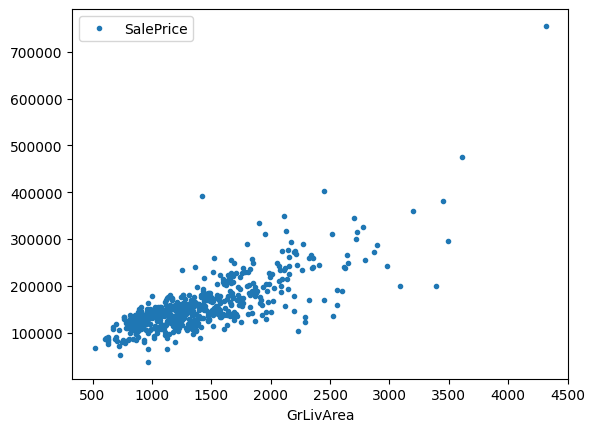

In [3]:
## Plot data
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [12]:
##  PLot reference theoretical linear model using mand b
x=data['GrLivArea']
y=data['SalePrice']


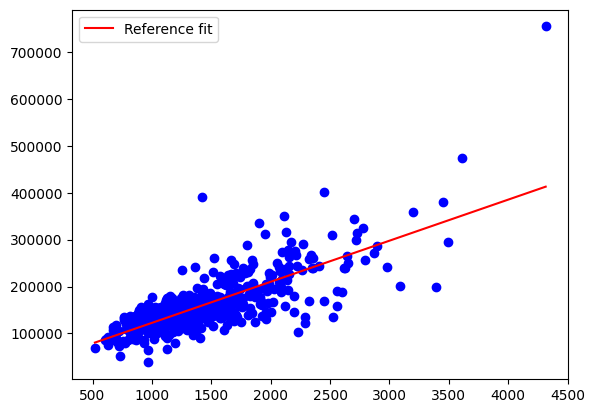

In [15]:
#First we define a plotting function because we're going to do this often and we want to reuse our code:

def plot_data(x,y,m=87.688145,b=34754.077892,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='Reference fit') ;plt.legend()
    
# Use the fucntion 
plot_data(x=data['GrLivArea'],y=data['SalePrice'])

In [16]:
## Define SGD linear model. 

# Define function with model with 2 parameters
def model(x,m,b):
    return x*m + b



#### The Loss Function

A _loss function_, or _objective function_, is something we define and is based on what we want to achieve. In the method of SGD, it is our goal to minimize (or make close to zero) the values calculated from the _loss function_. In our example, we ideally want the prediction of our _model_ to be equal to the actual data, though we will settle for "as close as possible".

So we will select our _loss function_ to be the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) function:

$$ L(y_i,\hat{y_i}) = (y_i - \hat{y_i}(x_i))^2 $$

where $y_i$ is our $i^{th}$ entry in the `data['SalePrice']` vector and $\hat{y_i}$ is the prediction based on evaluting $m * x_i + b$.

This function looks like the figure below when we plot it with $x=y_i - \hat{y_i}(x_i)$ and we we want to be down near $y_i - \hat{y_i}(x_i) = 0$ which indicates that our $y_i$ is as close as possible to $\hat{y_i}$.

<p float="center">
  <img src="figures/loss_func.png" width="400" /> 
</p>

Here we crate a function that calculates this for us.

In [18]:
def loss_funtion(x,y, m,b): # Takes the ref, pred, and parameters to be optimized 
    y_predicted = model(x,y,m,b)
    return np.power((y-y_predicted),2)

In [19]:
## Define functions to update m and b

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db


In [21]:
## Define intial parameters
m = 1.
b = 1.0
pri
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 1.00 * x + 1.00
